In [85]:

import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
import sys
%matplotlib inline
import seaborn as sns
sys.path.append("src/eval/plotting")
from plotting.plotutils import *
%load_ext autoreload
%autoreload 2

current_dir = os.path.dirname(os.path.abspath(__file__))
environment_eval_dir = os.path.join(current_dir, "eval_experiments_and_configs", "mpe:MaterialTransport-v0")
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
save_eval_result_dir = os.path.join(environment_eval_dir, "eval_outputs")
save_plots_path = os.path.join(environment_eval_dir, "eval_figures")

def models_eval_dict_to_dataframe(models_eval_dict):
    """Convert a dictionary of model evaluations to a dataframe"""
    model_dataframes = []
    for model_name, seed_files in models_eval_dict.items():
        seed_dataframes = []
        for seed_id, seed_eval_file in enumerate(seed_files):
            with open(os.path.join(save_eval_result_dir, seed_eval_file), 'r') as json_file:
                data = json.load(json_file)
                data = pd.DataFrame(data)
                seed_dataframes.append(data)
        seed_eval_df = pd.concat(seed_dataframes)
        seed_eval_df['models'] = model_name
        model_dataframes.append(seed_eval_df)
    model_dfs = pd.concat(model_dataframes)
    model_dfs = model_dfs.reset_index()
    return(model_dfs)

class DictView(object):
        def __init__(self, d):
            self.__dict__ = d
        def __str__(self):
             
             return(str(self.__dict__))

def load_models_training_metrics(experiment_dir, sacred_run, environment, results_rel_dir="results"):
    """Load the metrics from training and plot them"""
    sacred_dir = os.path.join(experiment_dir, results_rel_dir, "sacred_runs", environment.split(":")[-1], str(sacred_run))
    
    # loads the configuration from the sacred experiment (primarly config related to the model)
    with open(os.path.join(sacred_dir, "metrics.json"), 'r') as f:
        metrics = json.load(f)
    return metrics

def reformat_metrics(metrics):
     """"""
     print(metrics)
     
       


# Training Curves

9768
         steps                  timestamps    values    model  seed   
0         6400  2023-08-12T17:33:39.400209 -1.695313  CA(GNN)     1  \
1        57600  2023-08-12T17:33:48.346104 -1.531250  CA(GNN)     1   
2       108800  2023-08-12T17:33:57.004191 -1.656250  CA(GNN)     1   
3       160000  2023-08-12T17:34:05.808023 -1.410156  CA(GNN)     1   
4       211200  2023-08-12T17:34:14.449318 -1.660156  CA(GNN)     1   
...        ...                         ...       ...      ...   ...   
9763  79753807                         NaN  0.714844  CA(GNN)     1   
9764  79810125                         NaN  0.714844  CA(GNN)     1   
9765  79864810                         NaN  0.714844  CA(GNN)     1   
9766  79920683                         NaN  0.714844  CA(GNN)     1   
9767  79971211                         NaN  0.714844  CA(GNN)     1   

      smoothed_y  
0      -1.695313  
1      -1.608964  
2      -1.626413  
3      -1.563529  
4      -1.587125  
...          ...  
9763    0

(<Figure size 1170x827 with 1 Axes>,
 <Axes: xlabel='Environment Steps', ylabel='Average Return'>)

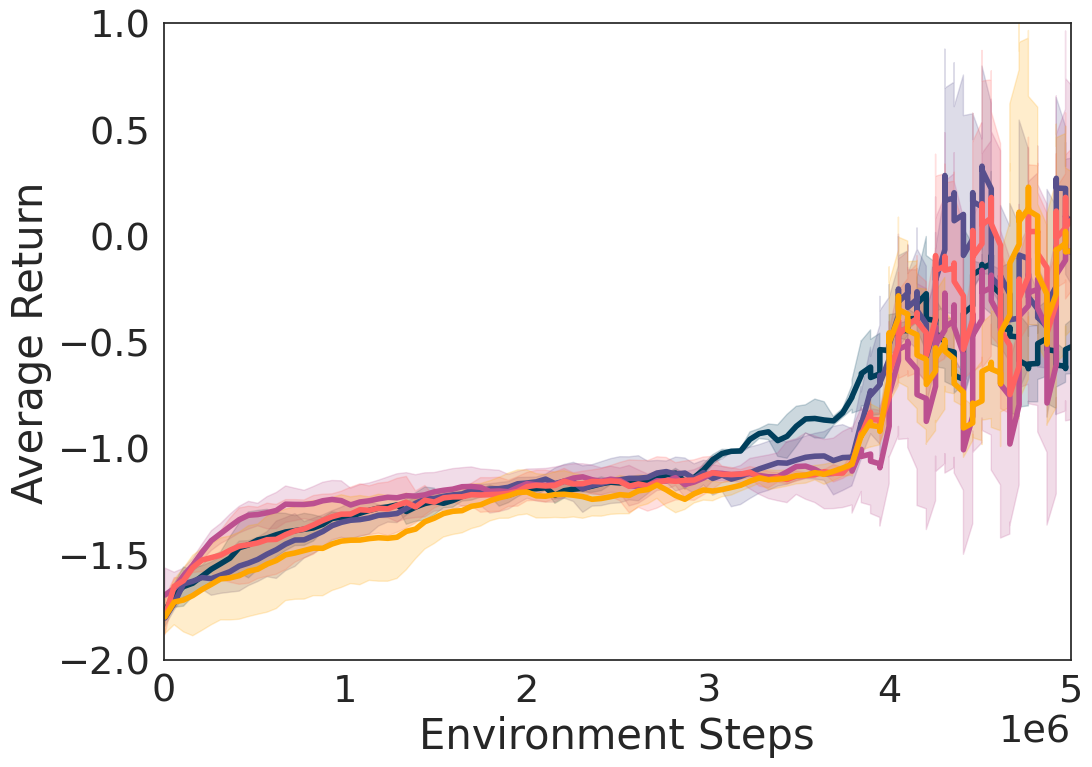

In [82]:
# models to plot
# Plot the training curves for this models
save_eval_result_dir = os.path.join(environment_eval_dir, "eval_outputs")
save_plots_path = os.path.join(environment_eval_dir, "eval_figures")

models_dict = {
    "GNN_CA_4_agents_MT" : {
        "seed": [1, 2, 43], #2, 43],
        "name": "CA+CC(GNN)"},

    "MLP_CA_4_agents_MT" : {
        "seed": [1, 2, 3], # 2, 3],
        "name": "CA(MLP)"},

    "GNN_CA_SKIP_4_agents_MT" : {
        "seed": [1, 2, 3], # 2, 3],
        "name": "CA(GNN)"},

    "GNN_ID_4_agents_MT" : {
        "seed": [1, 2, 54], #2, 54],
        "name": "ID(GNN)"},

    "MLP_ID_4_agents_MT" : {
        "seed": [1, 2], # 2],
        "name": "ID(MLP)"},
}

environment = "mpe:MaterialTransport-v0"
experiment_path = os.path.join(environment_eval_dir, "experiments")

# open the sacred directory and get the metrics file

# build a dataframe of all the models you want to plot
all_data = []
for og_model_name, plot_context in models_dict.items():
    seed_list = plot_context["seed"]
    plot_model_name = plot_context["name"]
    experiment_dir = os.path.join(experiment_path, og_model_name)

    for seed in seed_list:
        metrics = load_models_training_metrics(experiment_dir, seed, environment, "results")["test_return_mean"]
        metrics_df = pd.DataFrame(metrics)
        metrics_df["model"] = plot_model_name
        metrics_df["seed"] = seed
        all_data.append(pd.DataFrame(metrics_df))
    
pd.concat(all_data)
hue_order = ["ID(MLP)", "ID(GNN)", "CA(MLP)", "CA(GNN)", "CA+CC(GNN)"]
# hue_order = ["ID(MLP)", "ID(GNN)"]
data = pd.concat(all_data)

plot_training_curves(data=data, scaling_factor=0.1, hue_order=hue_order, estimator='mean',
                     ylabel="Average Return", xlabel="Environment Steps",
                     save_path=save_plots_path, fig_name="training_avg_return.png", xlim=[0, 5000000], ylim=[-2, 1])


# Comapre Results on Seen vs. Unseen for each model



### New Robots Generalization
Generalization to new robots (resampled) for teams of size 3, 4, 5

KeyboardInterrupt: 

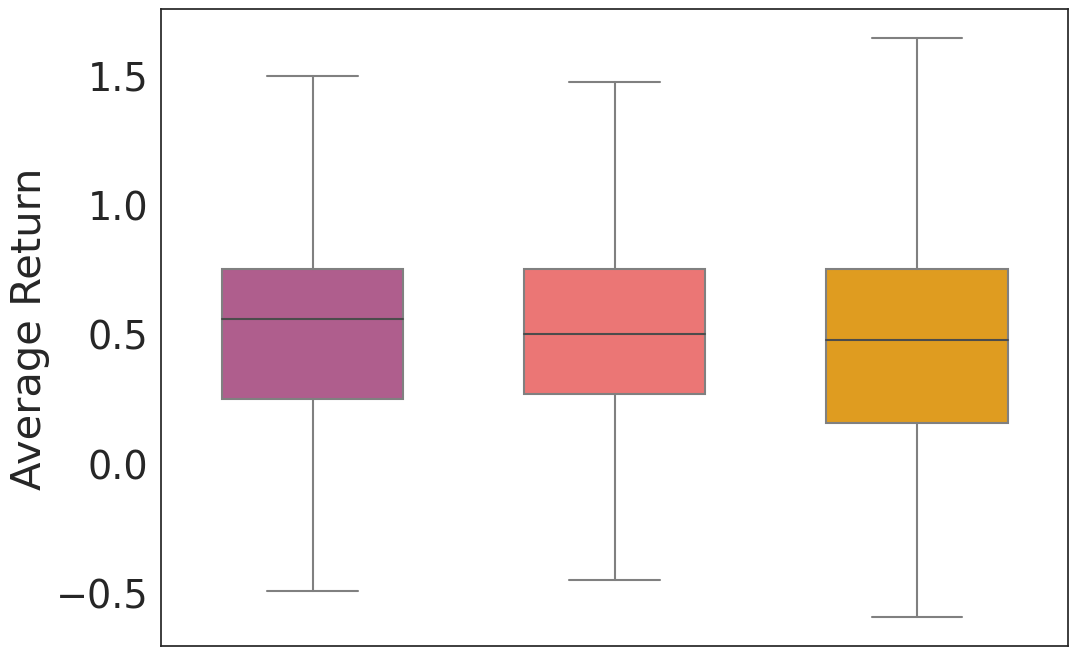

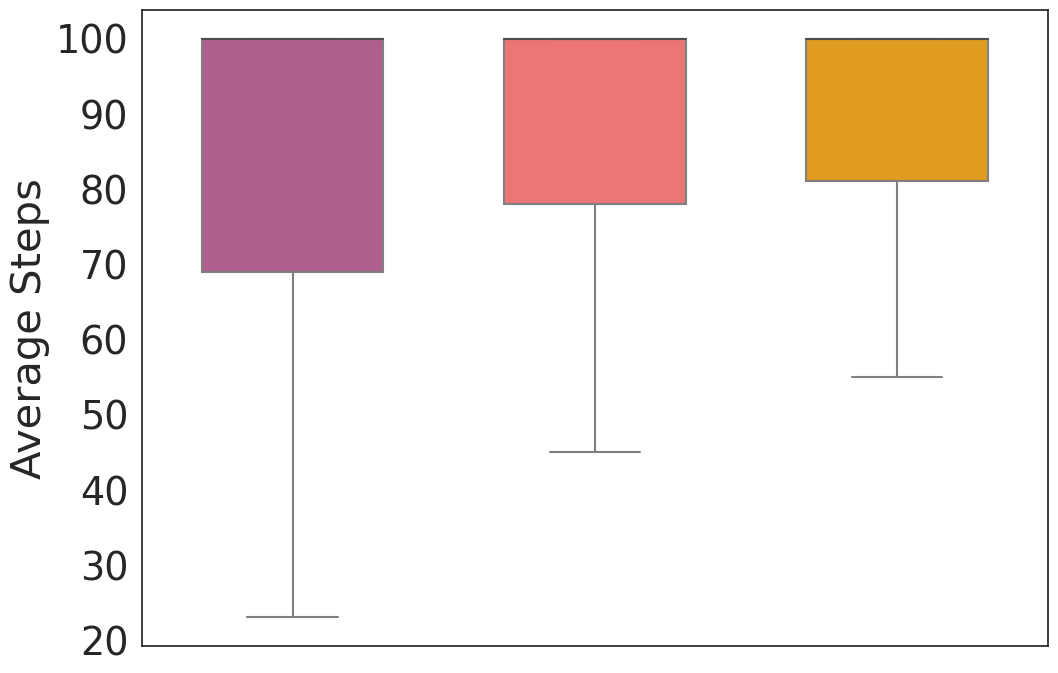

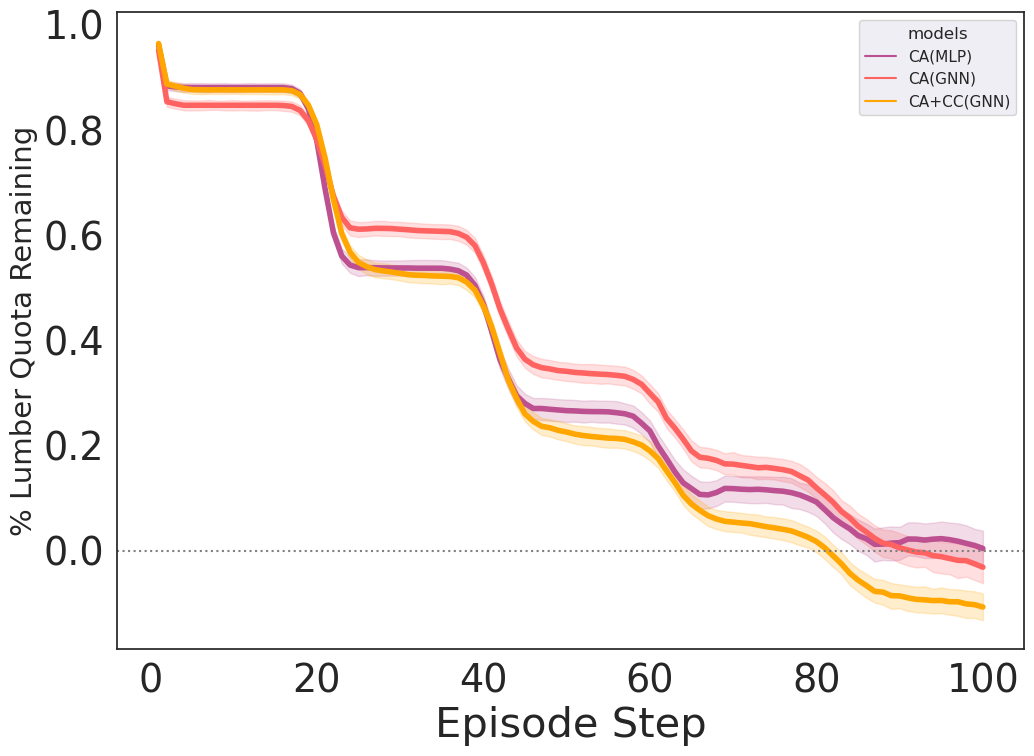

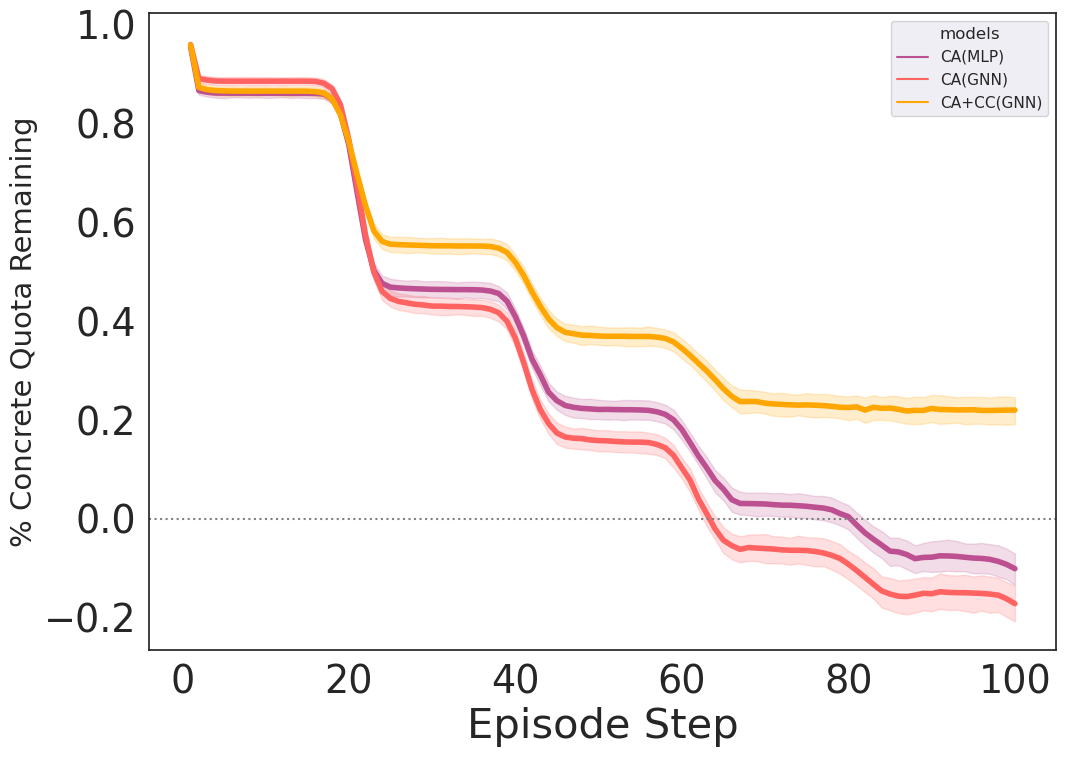

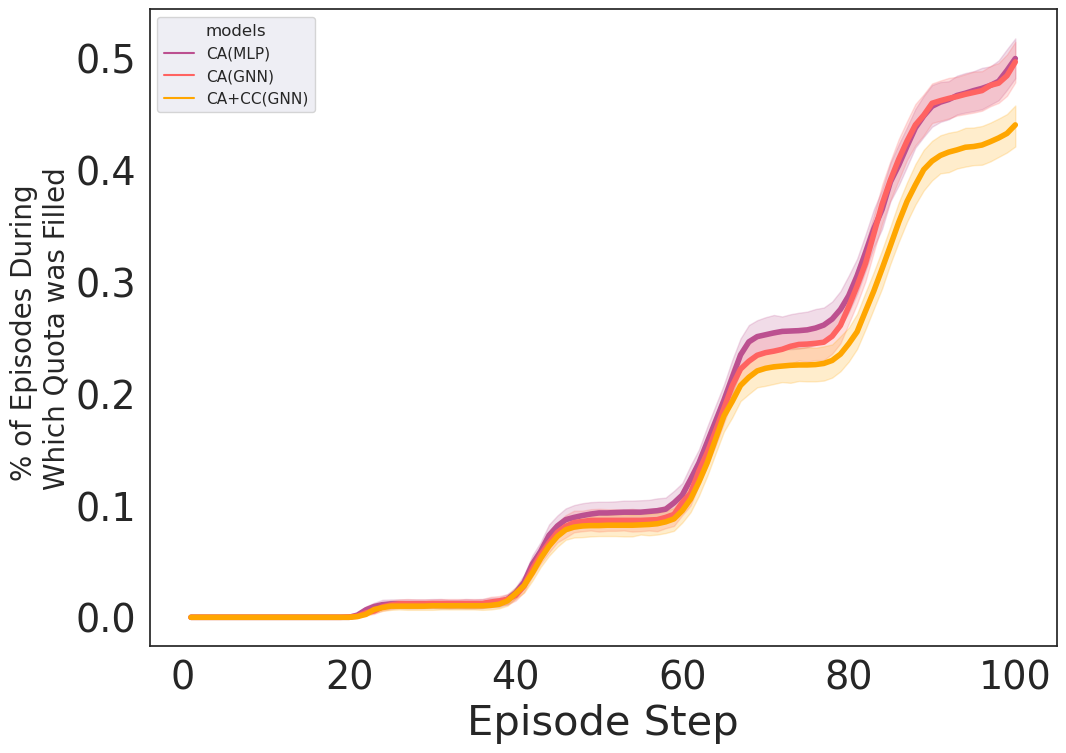

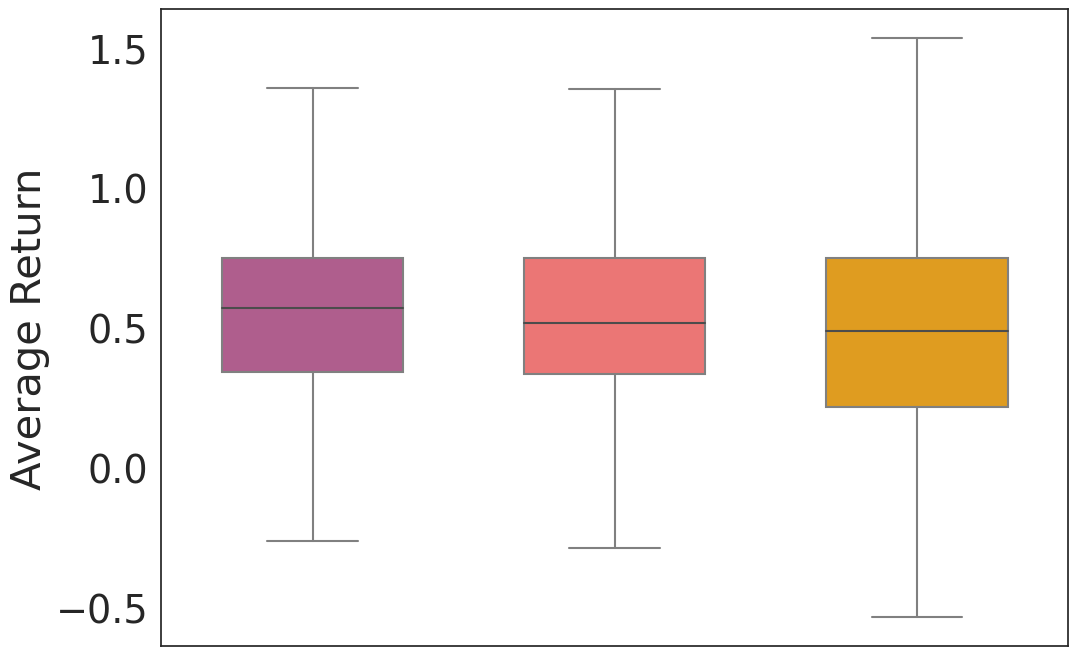

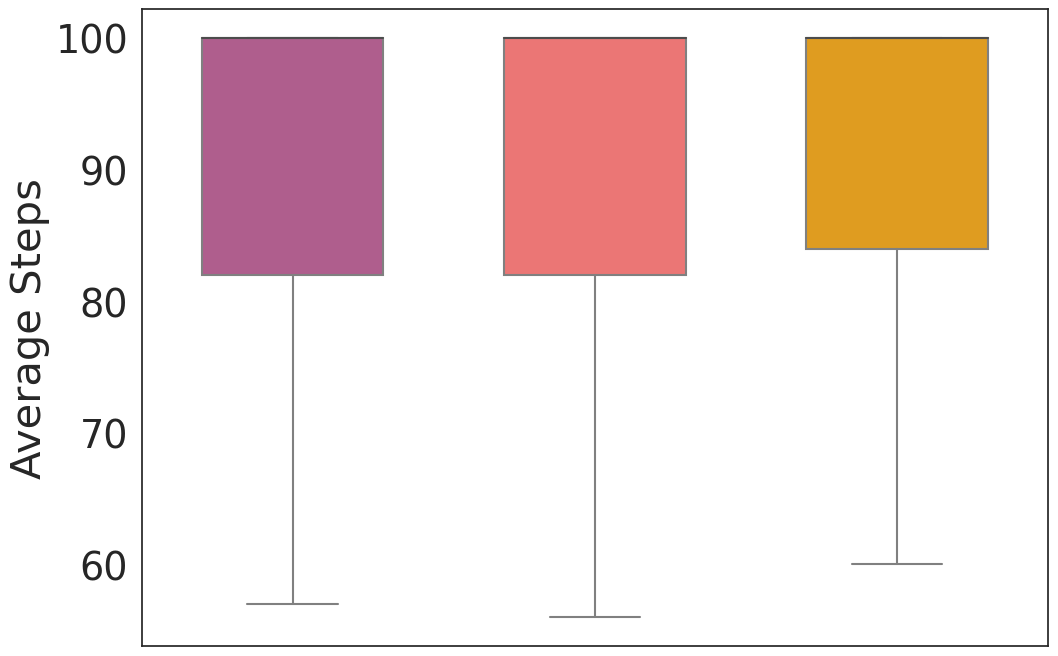

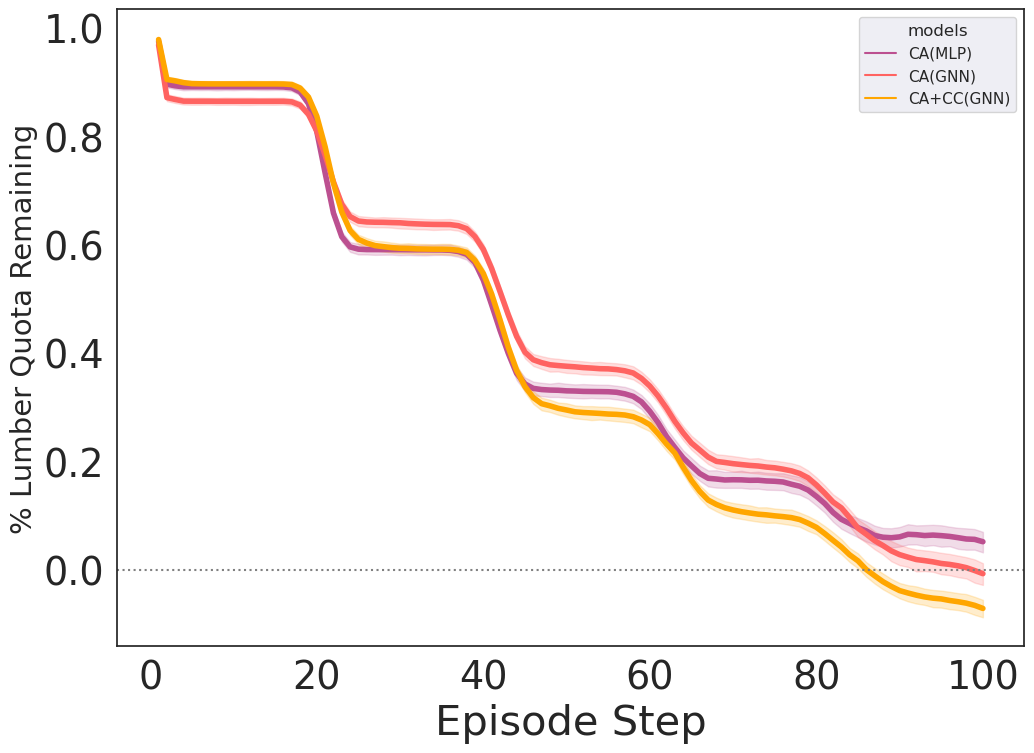

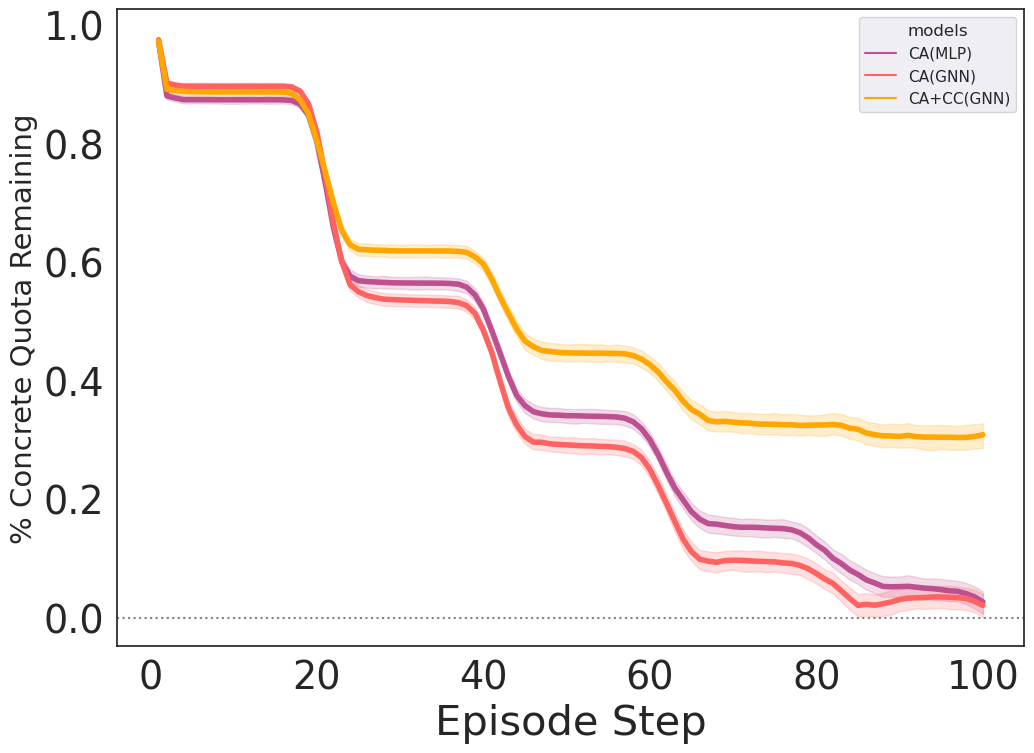

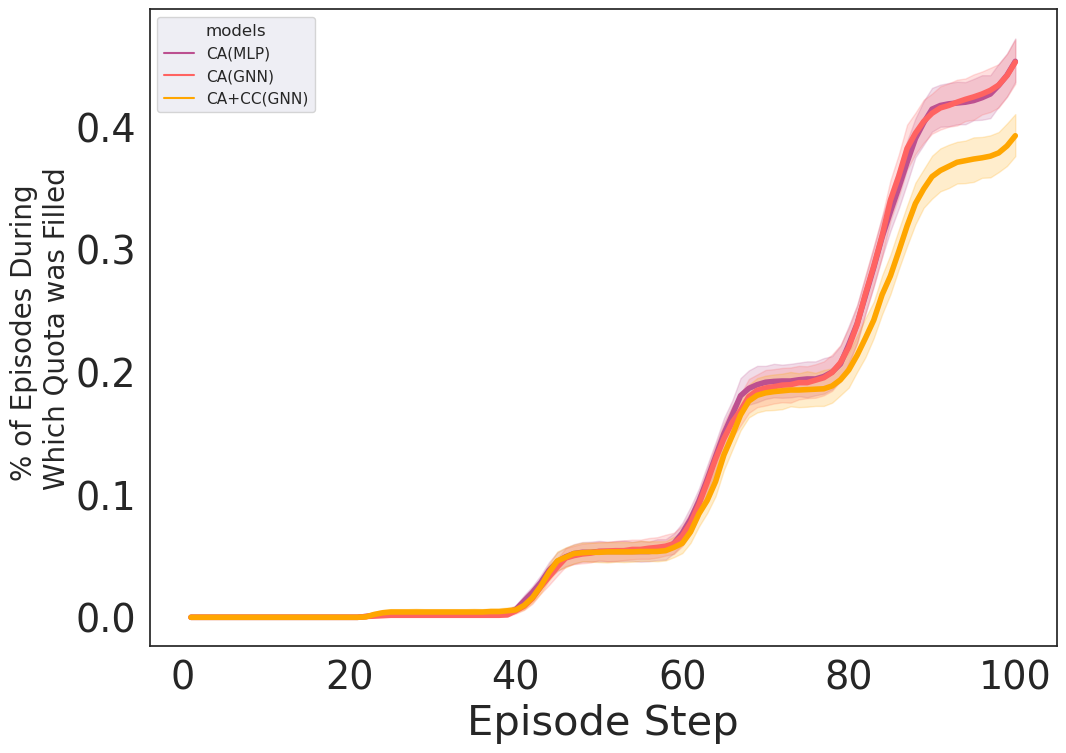

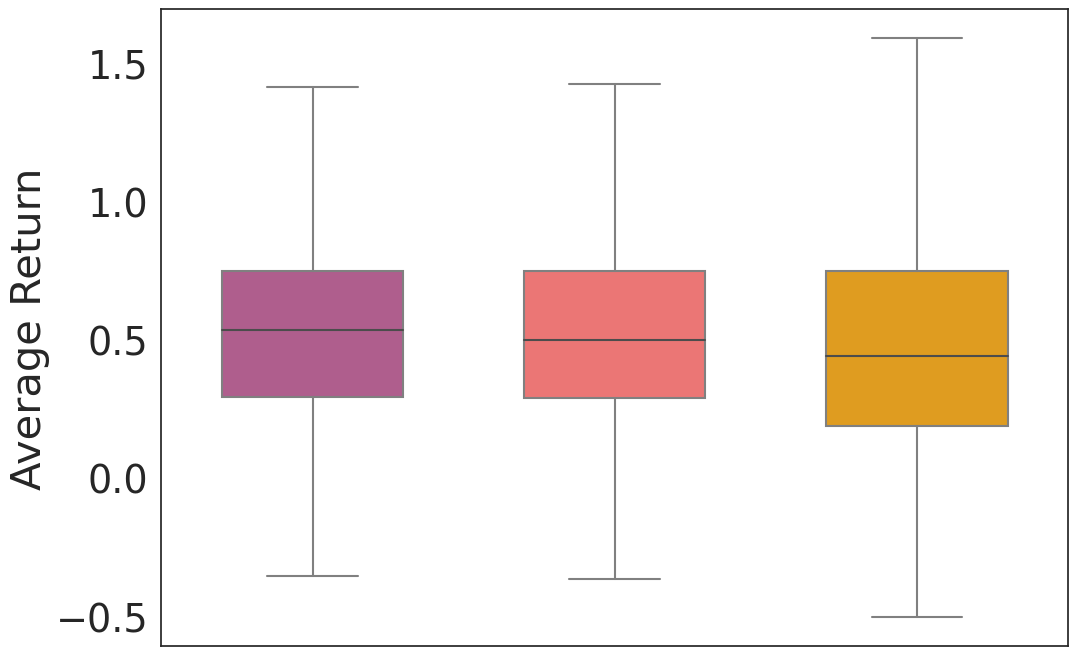

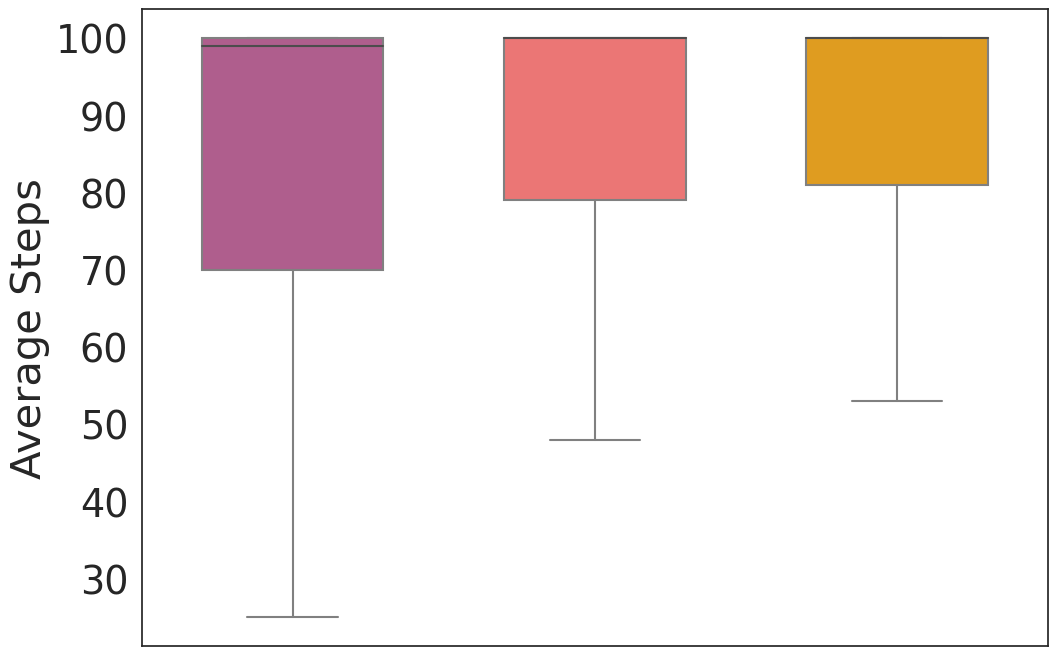

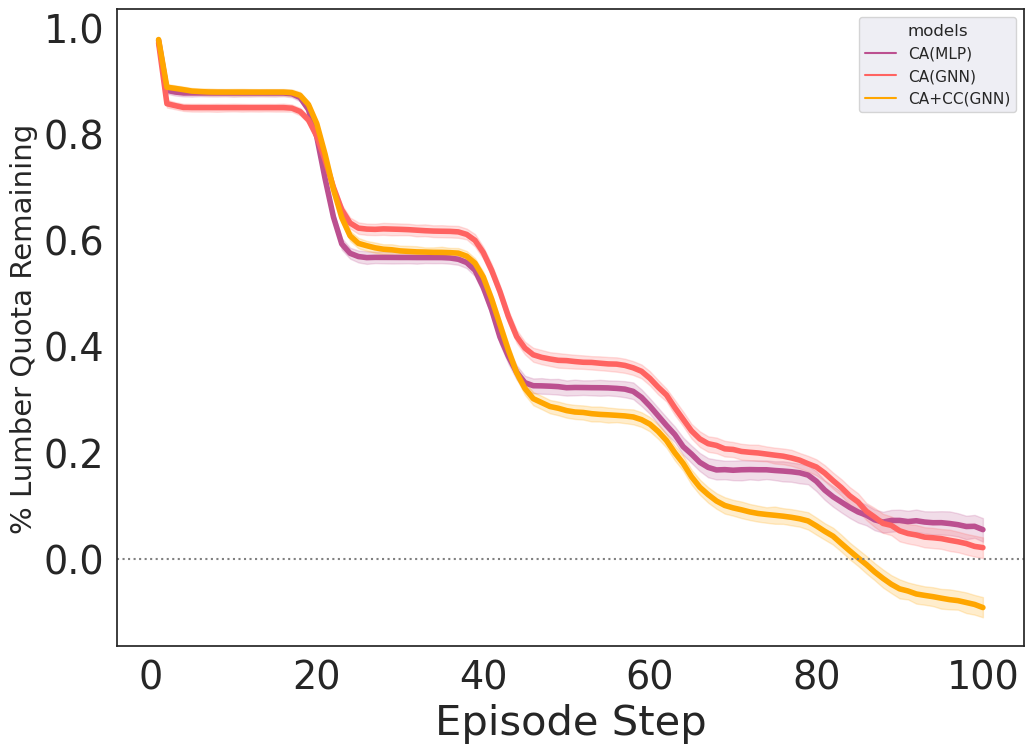

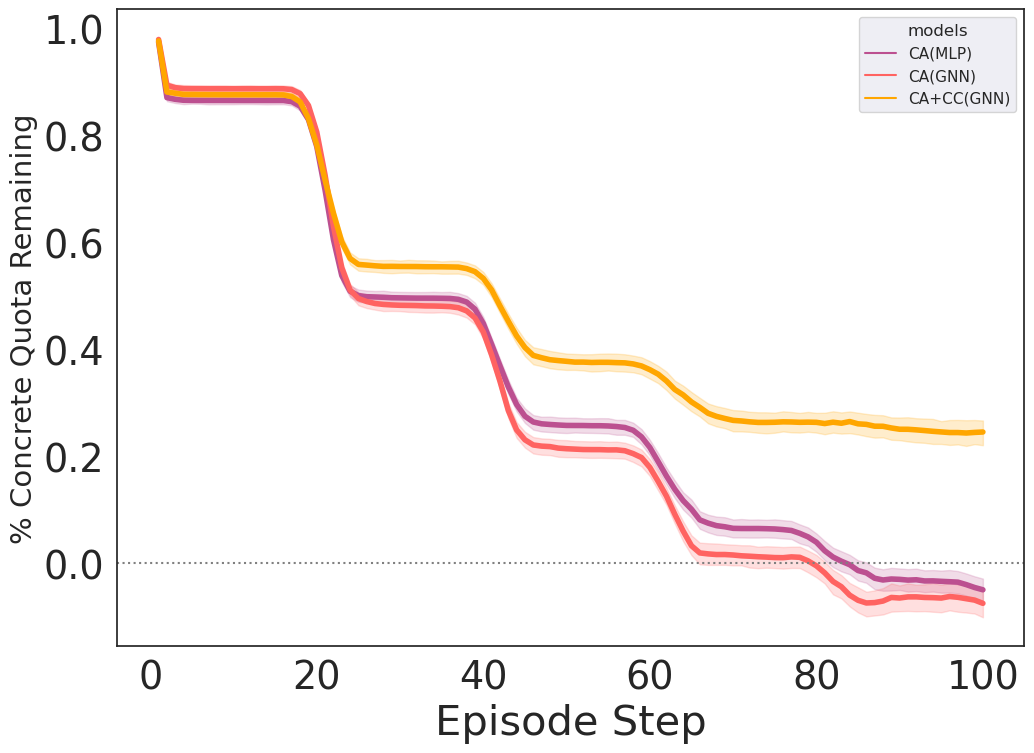

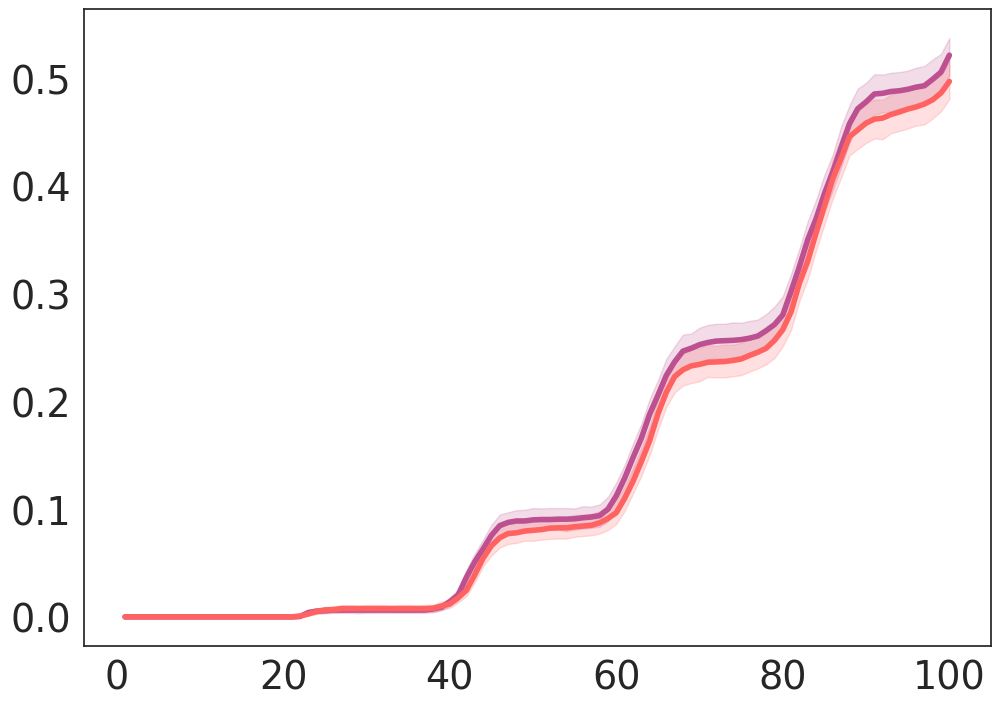

In [81]:
# Eval 1
save_eval_result_dir = os.path.join(environment_eval_dir, "eval_outputs")
for n_robots in [3, 4, 5]:

    models_eval_dict = {
        "CA+CC(GNN)": [
            f"eval_{n_robots}_agents_CA_unseen_GNN_CA_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_GNN_CA_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_GNN_CA_4_agents_MT_sacred_run_43.json"
        ],
        "CA(GNN)": [
            f"eval_{n_robots}_agents_CA_unseen_GNN_CA_SKIP_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_GNN_CA_SKIP_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_GNN_CA_SKIP_4_agents_MT_sacred_run_3.json"
        ],
        "CA(MLP)": [
            f"eval_{n_robots}_agents_CA_unseen_MLP_CA_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_MLP_CA_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_MLP_CA_4_agents_MT_sacred_run_3.json"
        ]
    }

    evals_df = models_eval_dict_to_dataframe(models_eval_dict)

    remove_x_ticks=True

    order = ["CA(MLP)", "CA(GNN)", "CA+CC(GNN)"]
    xlabel_fontsize=23.0
    boxplot_v0(evals_df, x="models", y="returns", ylabel="Average Return", order=order, remove_x_ticks=remove_x_ticks,
            xlabel="", fig_name=f"new_robots_{n_robots}_robots_avg_return.png", save_path=save_plots_path, xlabel_fontsize=xlabel_fontsize)
    boxplot_v0(evals_df, x="models", y="steps", ylabel="Average Steps", order=order, remove_x_ticks=remove_x_ticks,
            xlabel="", fig_name=f"new_robots_{n_robots}_robots_avg_steps.png", save_path=save_plots_path, xlabel_fontsize=xlabel_fontsize)
    
    ylabel_fontsize=23.0
    
    plot_percentage_of_quota_remiaining(data=evals_df, which_quota="lumber", order=order, ylabel=f"% Lumber Quota Remaining",
                                        xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                                        fig_name=f"new_robots_{n_robots}_robots_lumber_quota_remaining.png", save_path=save_plots_path)

    plot_percentage_of_quota_remiaining(data=evals_df, which_quota="concrete", order=order, ylabel=f"% Concrete Quota Remaining",
                                        xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                                        fig_name=f"new_robots_{n_robots}_robots_concrete_quota_remaining.png", save_path=save_plots_path)
    
    ylabel_fontsize=20.0
    plot_total_quota_filled(data=evals_df, order=order, ylabel="% of Episodes During \nWhich Quota was Filled", xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                            fig_name=f"new_robots_{n_robots}_robots_total_quota_filled_per_step.png", save_path=save_plots_path, )


### New Teams with Trained Agents Generalization
In this evaluation, we sample new teams from the 20 robots in the training set of robots. This allows comparison with the ID methods

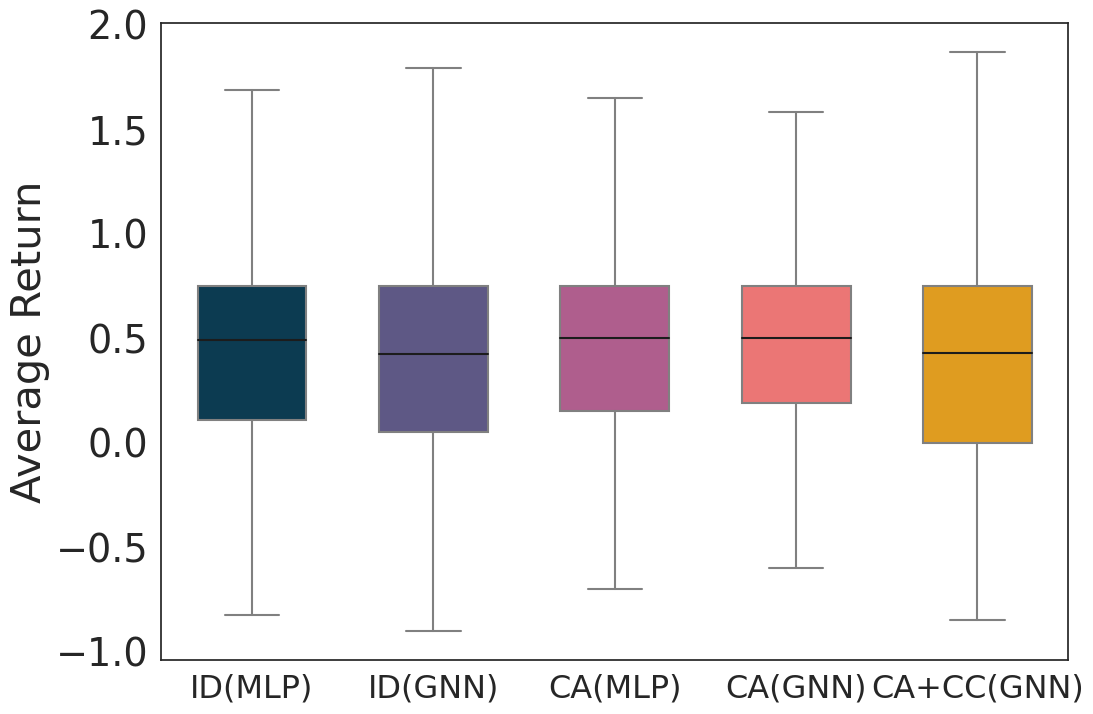

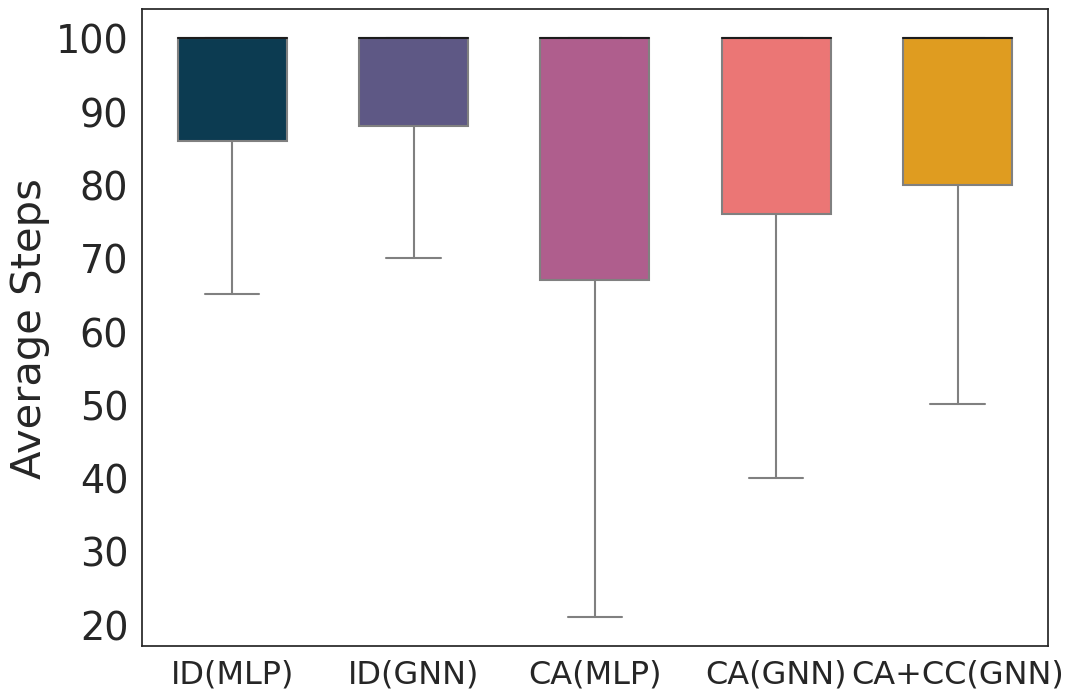

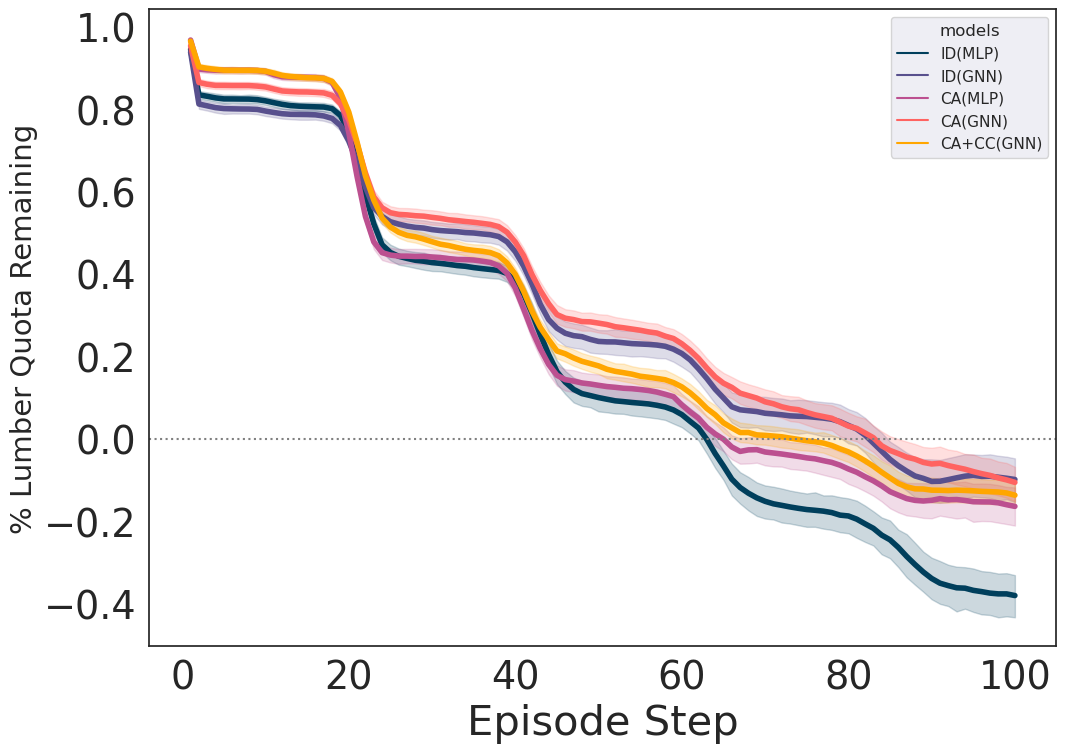

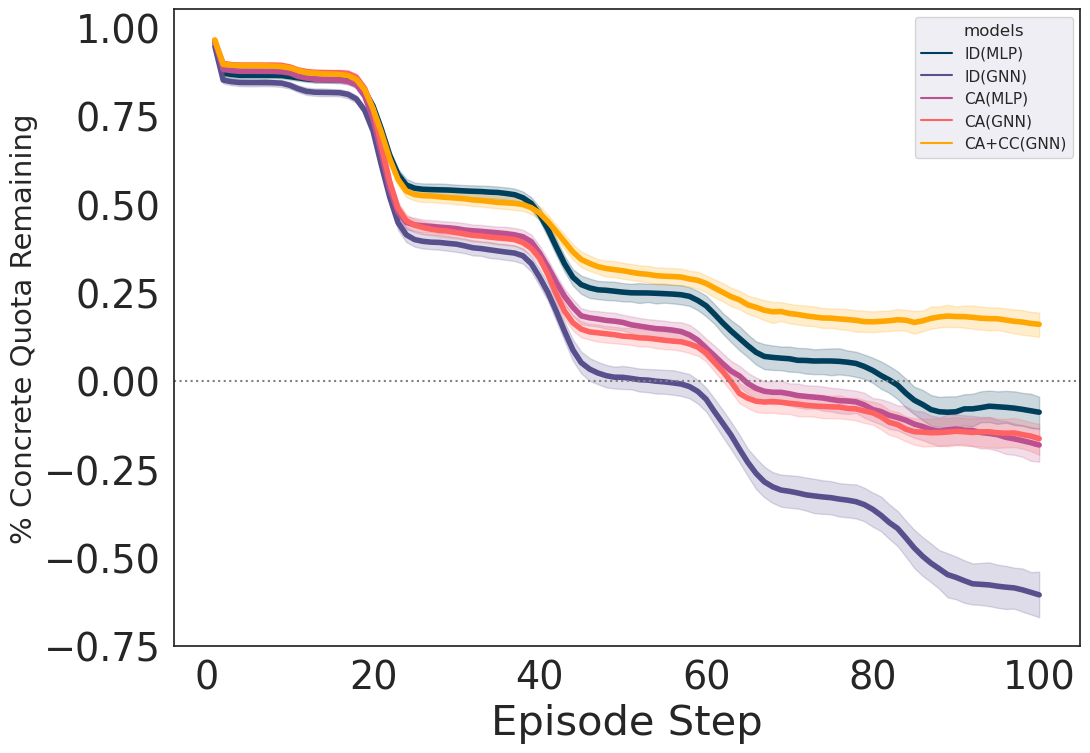

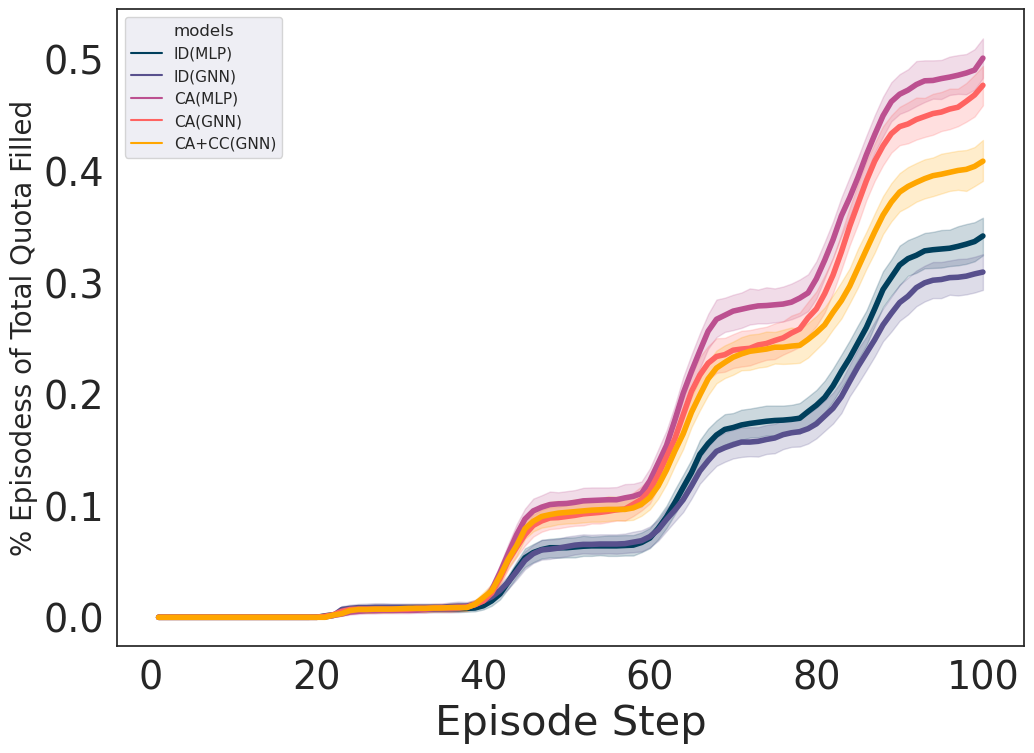

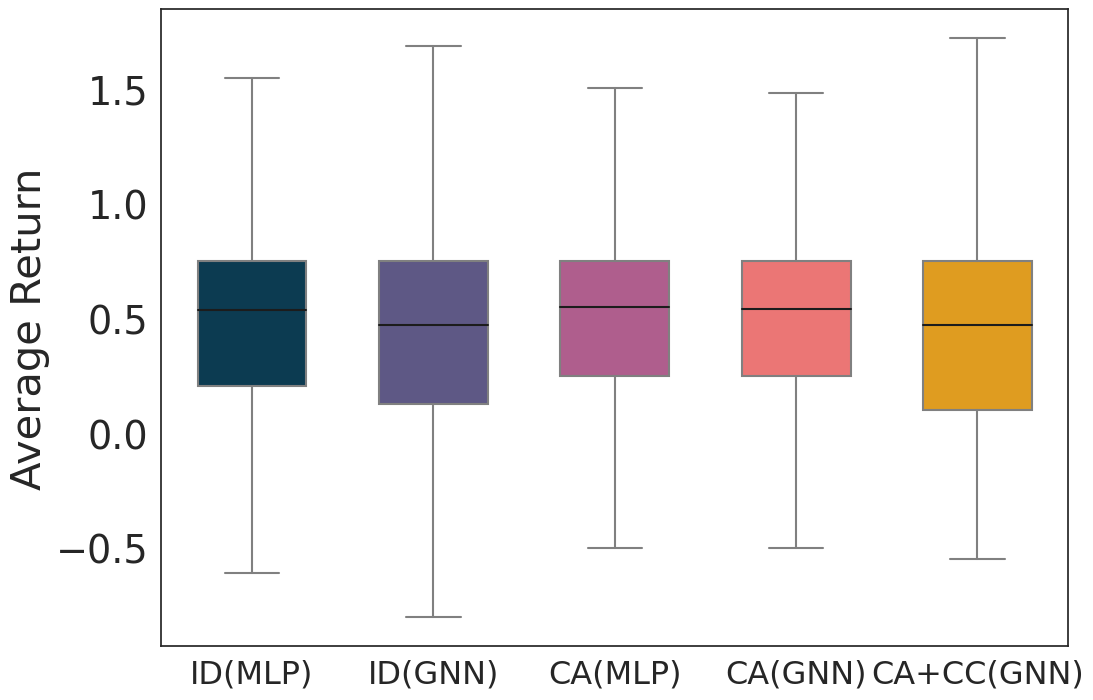

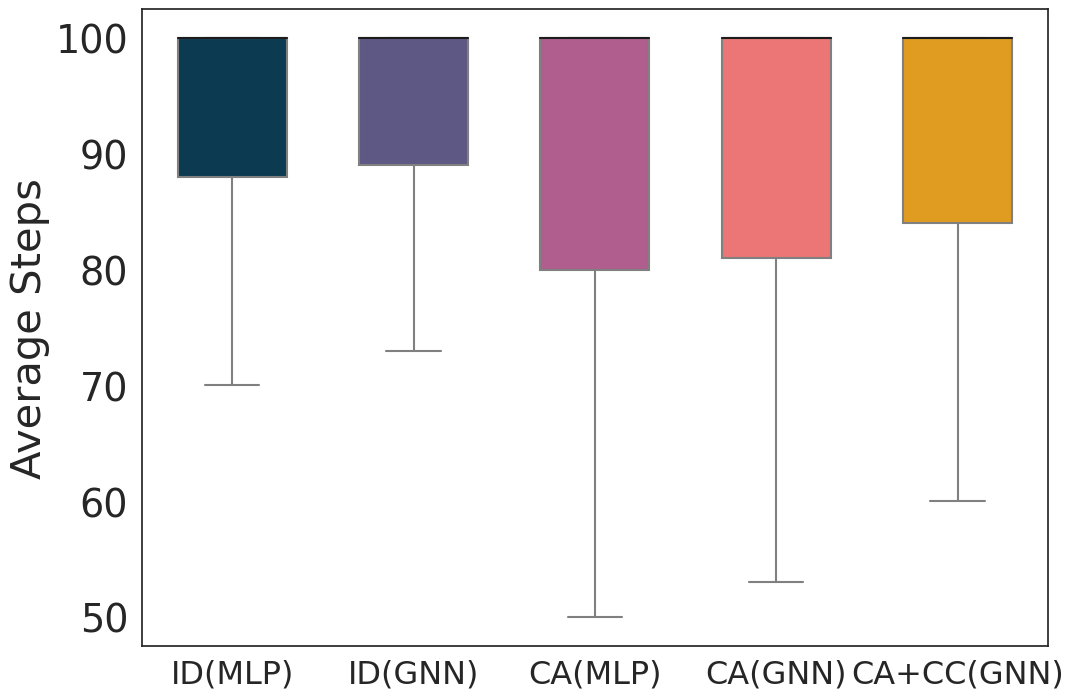

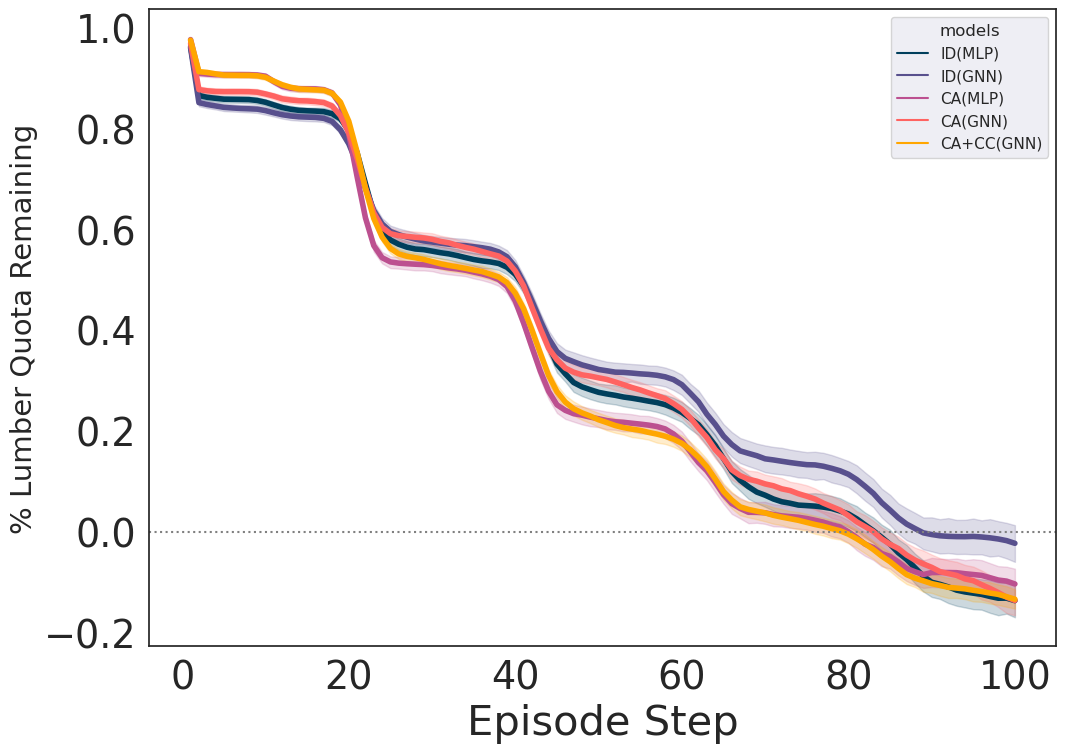

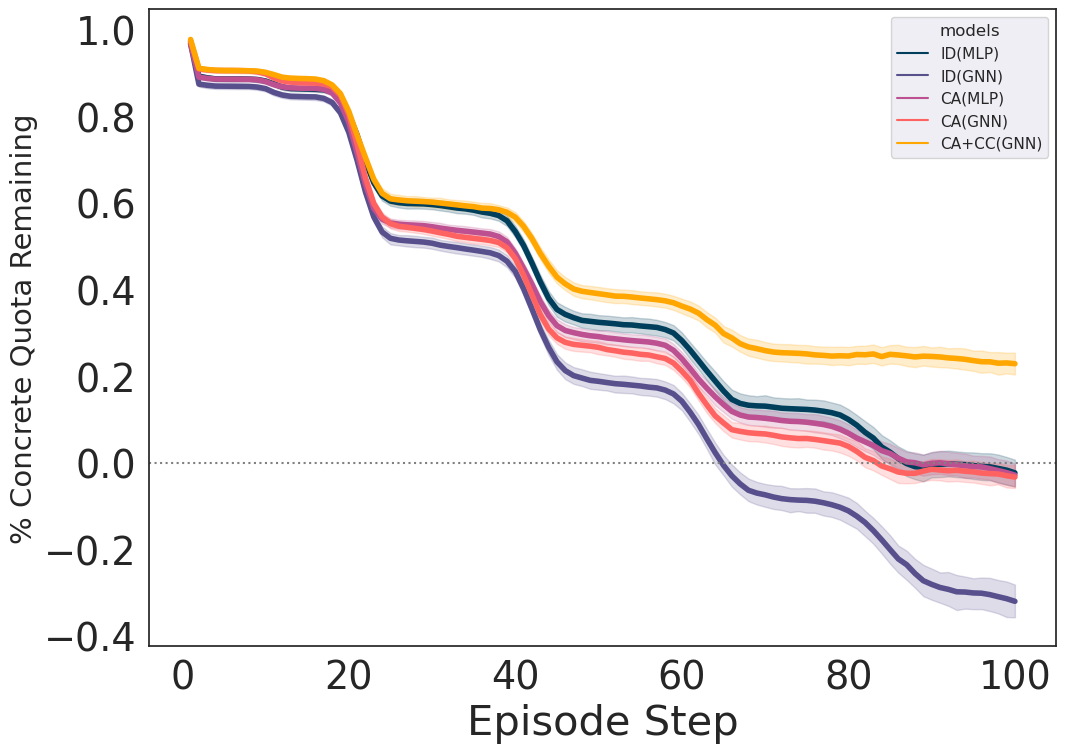

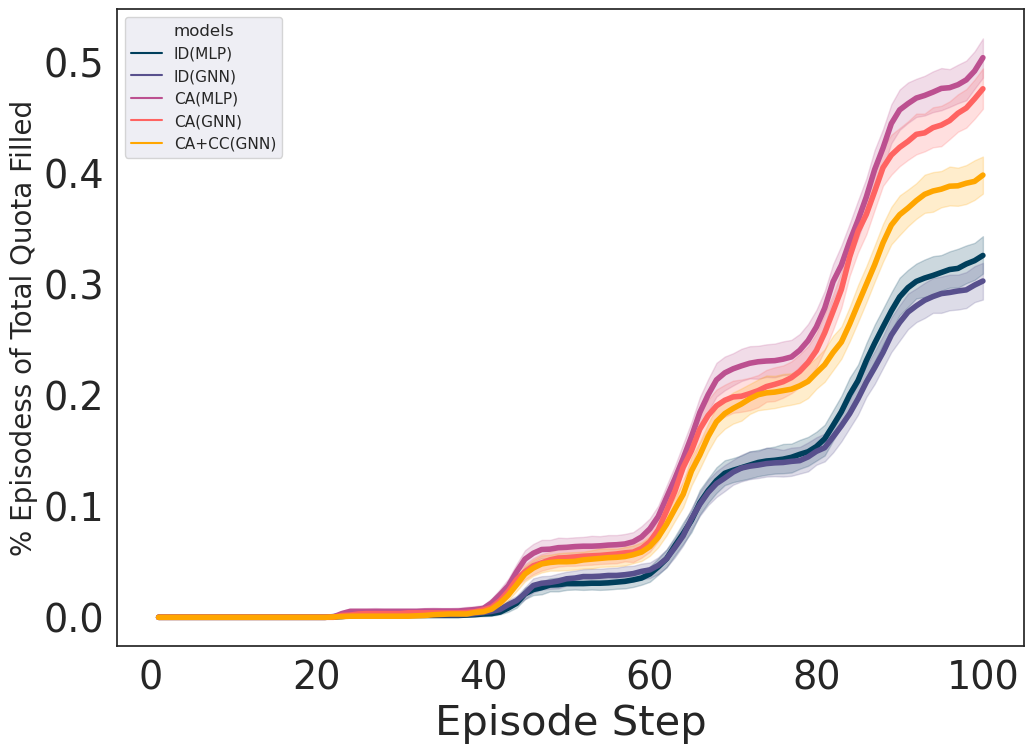

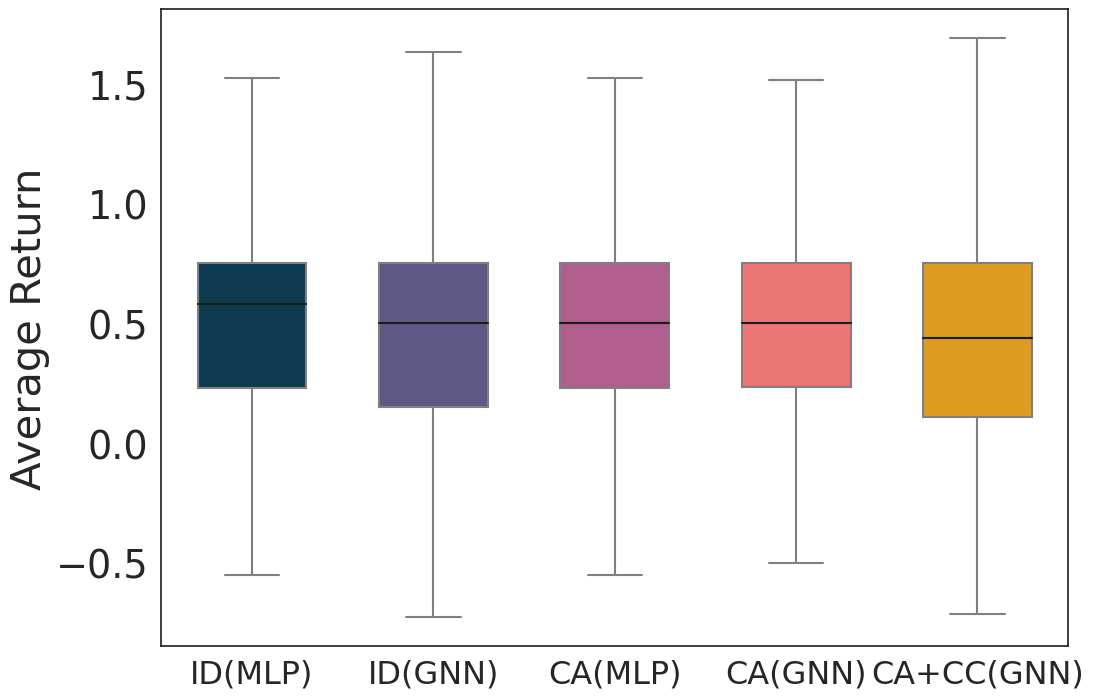

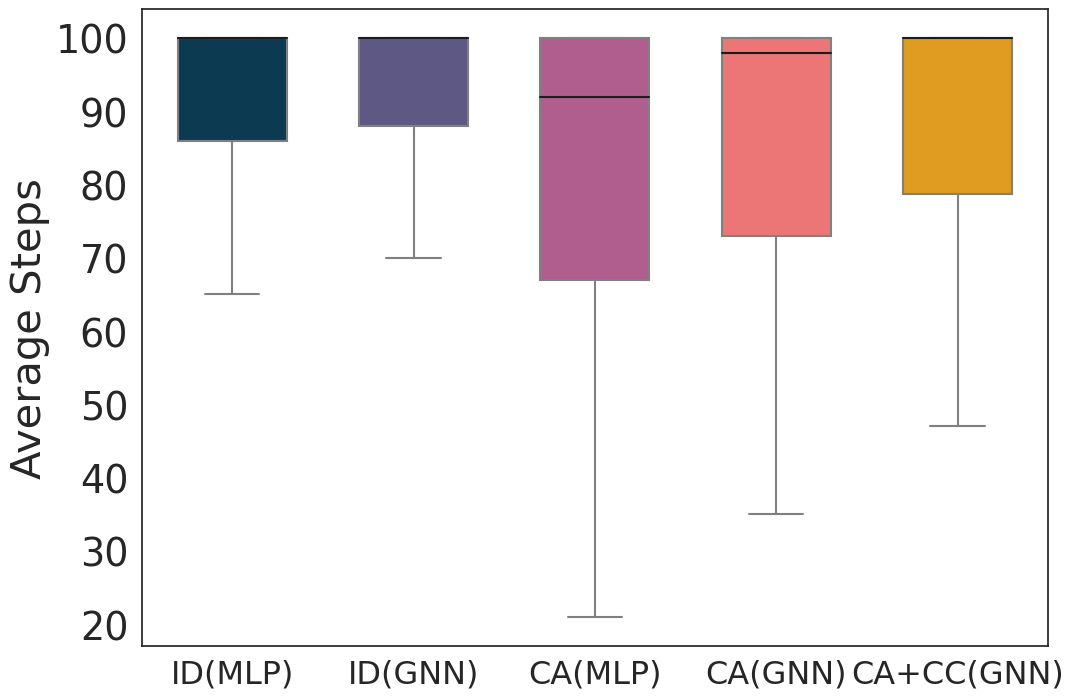

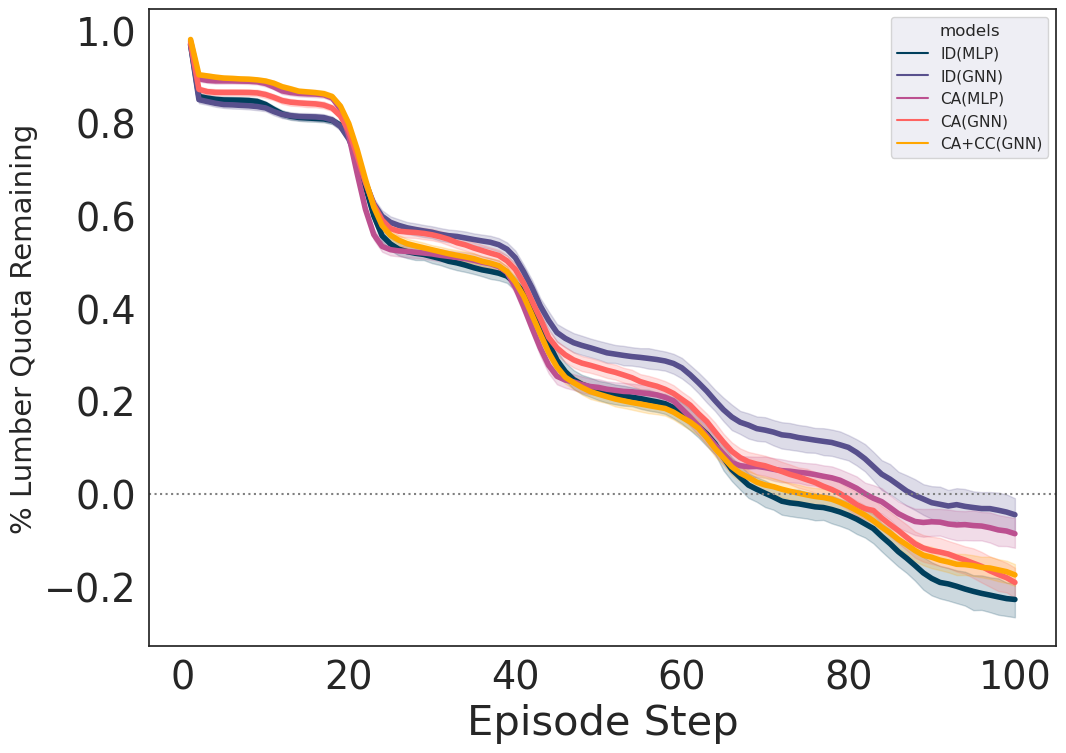

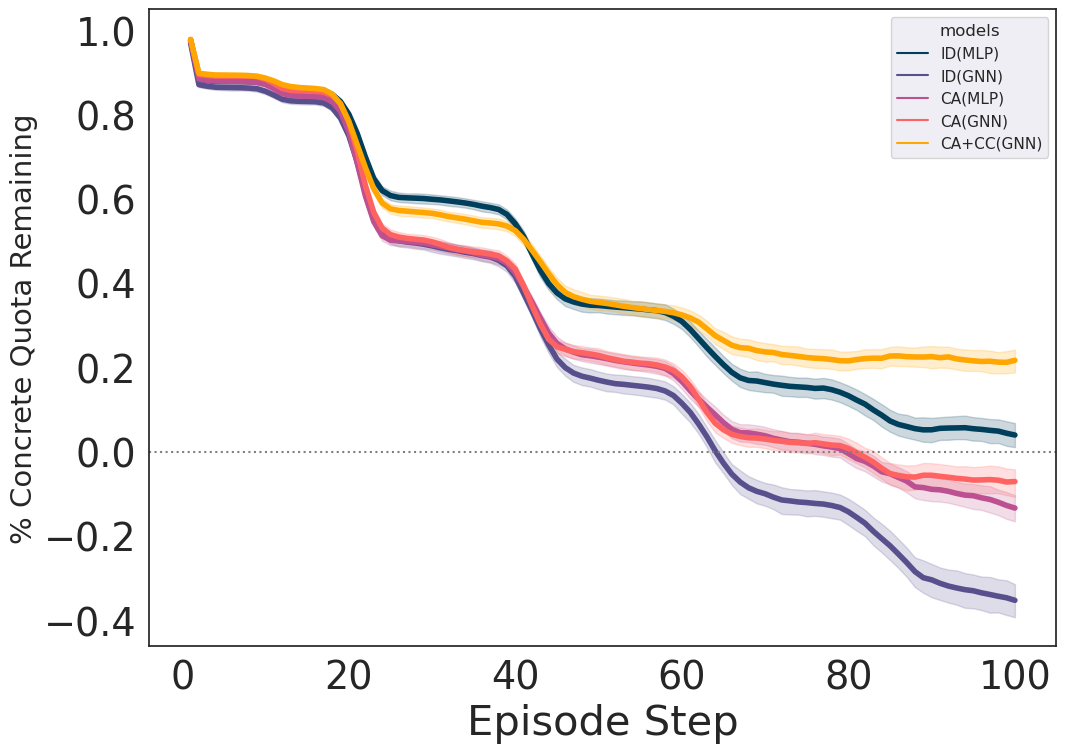

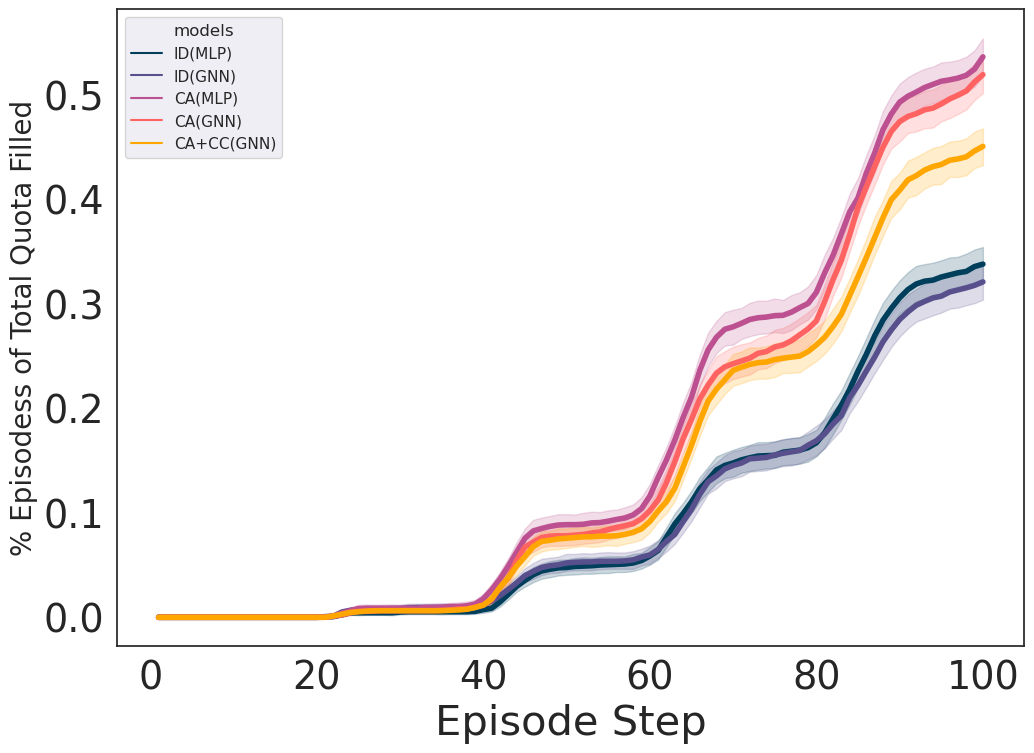

In [7]:
# Evaluation on UNSEEN TEAMS
save_eval_result_dir = os.path.join(environment_eval_dir, "eval_outputs")
for n_robots in [3, 4, 5]:
    models_eval_dict = {
        "CA+CC(GNN)": [
            f"eval_{n_robots}_agents_CA_unseen_teams_GNN_CA_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_teams_GNN_CA_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_teams_GNN_CA_4_agents_MT_sacred_run_43.json"
        ],
        "CA(GNN)": [
            f"eval_{n_robots}_agents_CA_unseen_teams_GNN_CA_SKIP_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_teams_GNN_CA_SKIP_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_teams_GNN_CA_SKIP_4_agents_MT_sacred_run_3.json"
        ],
        "CA(MLP)": [
            f"eval_{n_robots}_agents_CA_unseen_teams_MLP_CA_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_unseen_teams_MLP_CA_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_unseen_teams_MLP_CA_4_agents_MT_sacred_run_3.json"
        ],
        "ID(GNN)": [
            f"eval_{n_robots}_agents_ID_unseen_teams_GNN_ID_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_unseen_teams_GNN_ID_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_unseen_teams_GNN_ID_4_agents_MT_sacred_run_54.json"
        ],
        "ID(MLP)": [
            f"eval_{n_robots}_agents_ID_unseen_teams_MLP_ID_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_unseen_teams_MLP_ID_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_unseen_teams_MLP_ID_4_agents_MT_sacred_run_3.json"
        ]
    }

    evals_df = models_eval_dict_to_dataframe(models_eval_dict)
    order = ["ID(MLP)", "ID(GNN)", "CA(MLP)", "CA(GNN)", "CA+CC(GNN)"]
    remove_x_ticks=True
    xlabel_fontsize=23.0
    boxplot_v0(evals_df, x="models", y="returns", ylabel="Average Return", order=order, remove_x_ticks=remove_x_ticks,
            xlabel="", fig_name=f"new_teams_only_{n_robots}_robots_avg_return.png", save_path=save_plots_path, xlabel_fontsize=xlabel_fontsize)
    boxplot_v0(evals_df, x="models", y="steps", ylabel="Average Steps", order=order, remove_x_ticks=remove_x_ticks,
            xlabel="", fig_name=f"new_teams_only_{n_robots}_robots_avg_steps.png", save_path=save_plots_path, xlabel_fontsize=xlabel_fontsize)
    
    ylabel_fontsize=21.0
    plot_percentage_of_quota_remiaining(data=evals_df, which_quota="lumber", order=order, ylabel=f"% Lumber Quota Remaining",
                                        xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                                        fig_name=f"new_teams_only_{n_robots}_robots_lumber_quota_remaining.png", save_path=save_plots_path)

    plot_percentage_of_quota_remiaining(data=evals_df, which_quota="concrete", order=order, ylabel=f"% Concrete Quota Remaining",
                                        xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                                        fig_name=f"new_teams_only_{n_robots}_robots_concrete_quota_remaining.png", save_path=save_plots_path)
    
    ylabel_fontsize=20.0
    plot_total_quota_filled(data=evals_df, order=order, ylabel="% Episodess of Total Quota Filled", xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                            fig_name=f"new_teams_only_{n_robots}_robots_total_quota_filled_per_step.png", save_path=save_plots_path)


/home/dwalkerhowell3/processing_backup/ca-gnn-marl/eval/plotting/plotutils.py:150: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d" % (int(-1*float(x)) if x != 0 else x) for x in ax.get_yticks()])
/home/dwalkerhowell3/processing_backup/ca-gnn-marl/eval/plotting/plotutils.py:150: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d" % (int(-1*float(x)) if x != 0 else x) for x in ax.get_yticks()])
/home/dwalkerhowell3/processing_backup/ca-gnn-marl/eval/plotting/plotutils.py:169: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["%d" % (int(100*float(x))) for x in ax.get_yticks()])


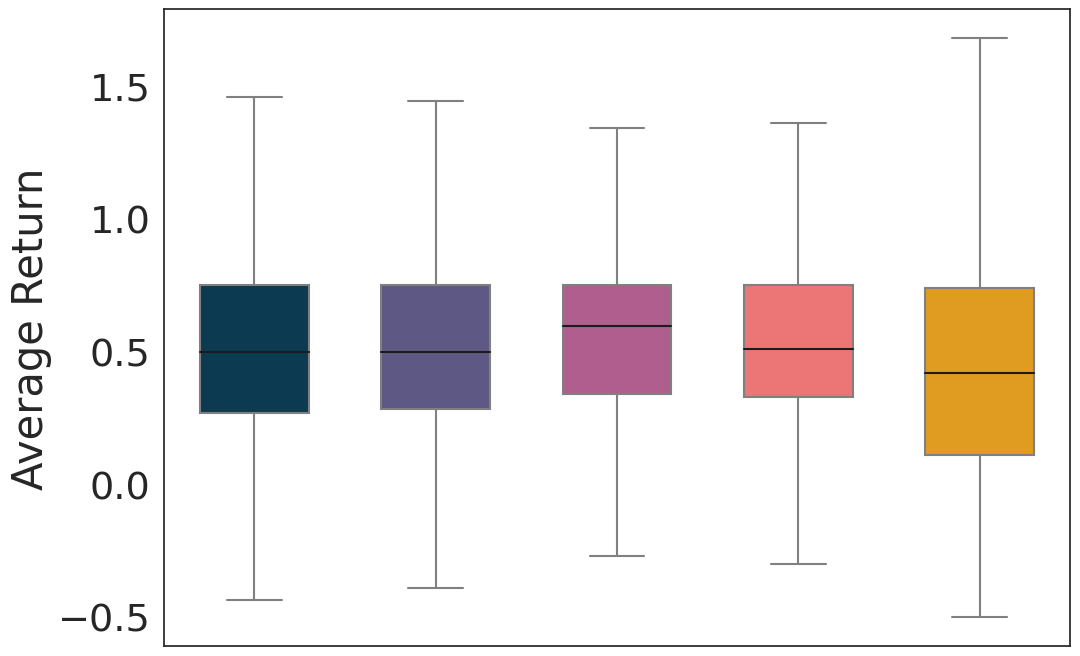

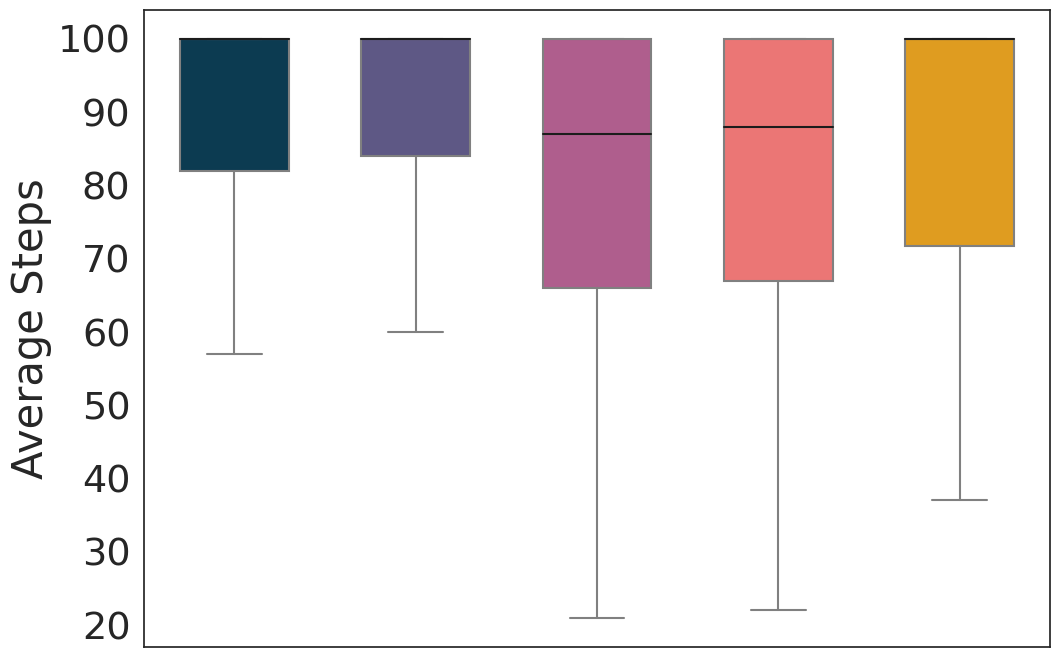

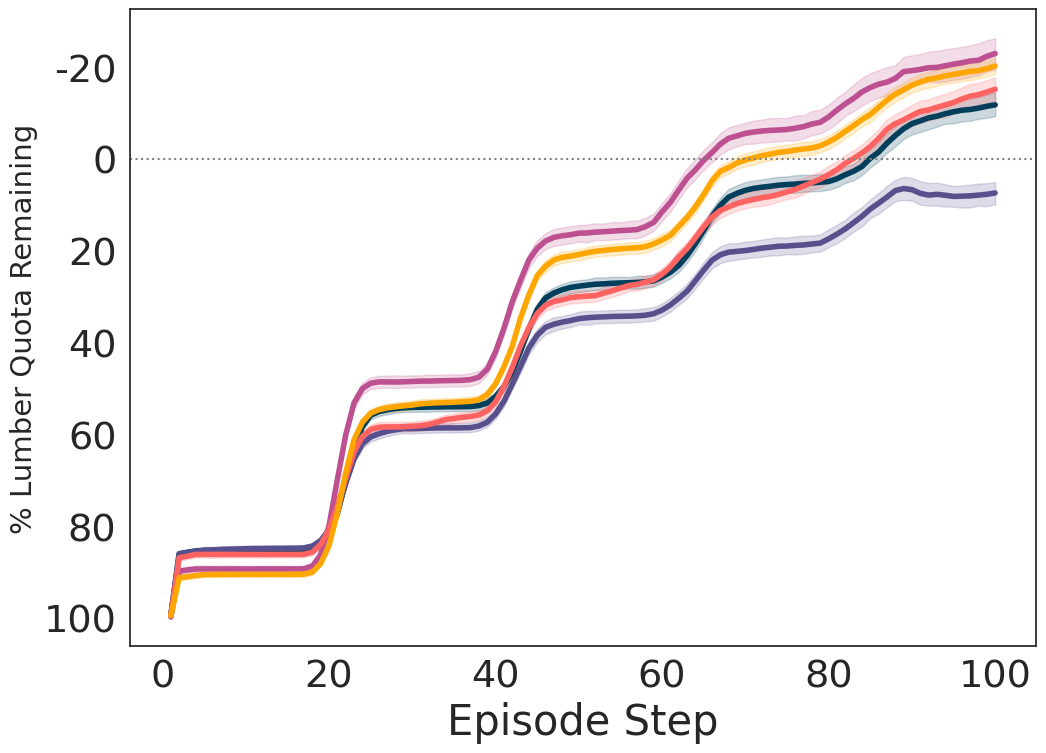

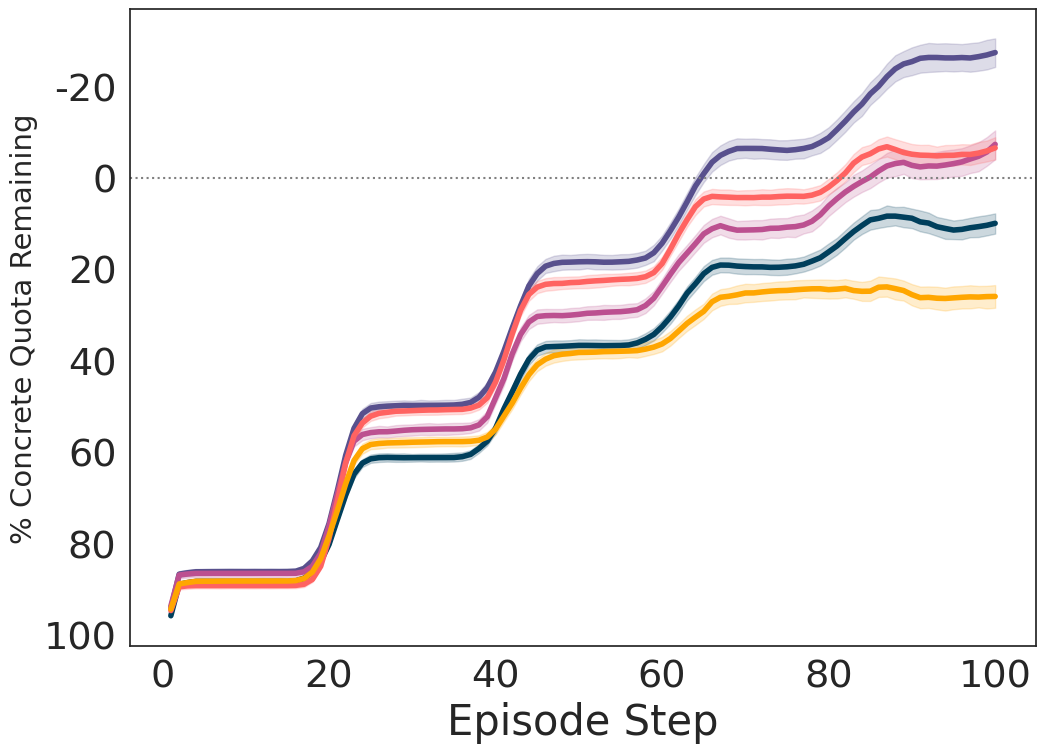

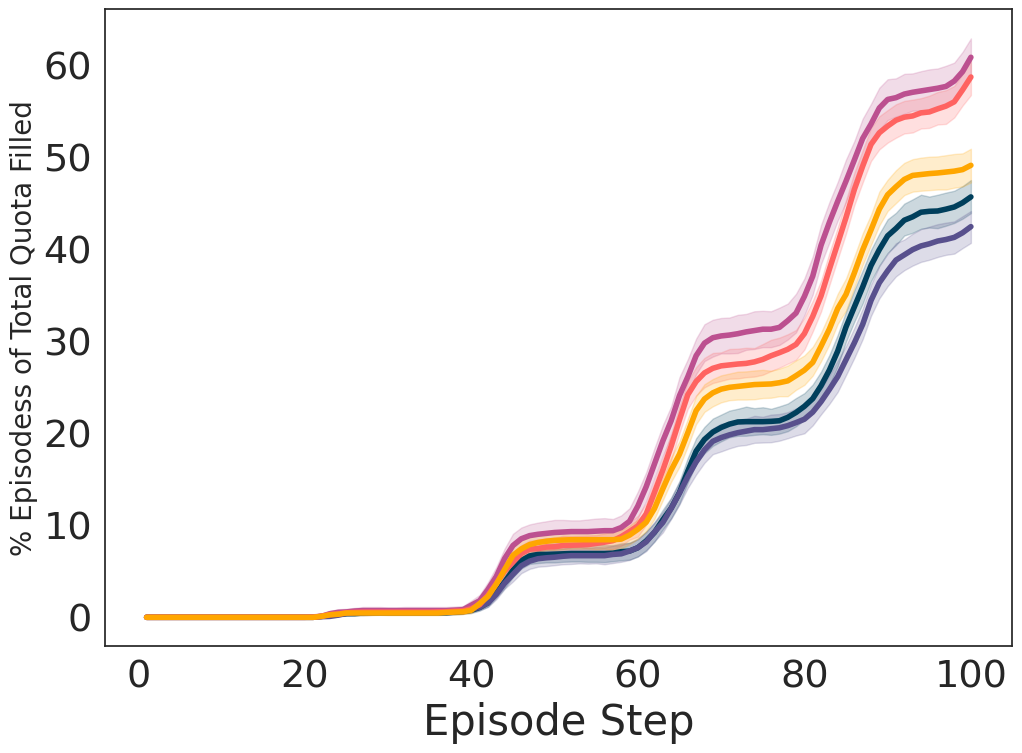

In [88]:
# Evaluation on SEEN TEAMS (THIS IS ONLY FOR 4 ROBOTS.) This is like a proper evaluation
# on the real training set for all models
save_eval_result_dir = os.path.join(environment_eval_dir, "eval_outputs")
save_plots_path = os.path.join(environment_eval_dir, "eval_figures")
for n_robots in [4]:
    models_eval_dict = {
        "CA+CC(GNN)": [
            f"eval_{n_robots}_agents_CA_seen_teams_GNN_CA_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_seen_teams_GNN_CA_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_seen_teams_GNN_CA_4_agents_MT_sacred_run_43.json"
        ],
        "CA(GNN)": [
            f"eval_{n_robots}_agents_CA_seen_teams_GNN_CA_SKIP_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_seen_teams_GNN_CA_SKIP_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_seen_teams_GNN_CA_SKIP_4_agents_MT_sacred_run_3.json"
        ],
        "CA(MLP)": [
            f"eval_{n_robots}_agents_CA_seen_teams_MLP_CA_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_CA_seen_teams_MLP_CA_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_CA_seen_teams_MLP_CA_4_agents_MT_sacred_run_3.json"
        ],
        "ID(GNN)": [
            f"eval_{n_robots}_agents_ID_seen_teams_GNN_ID_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_seen_teams_GNN_ID_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_seen_teams_GNN_ID_4_agents_MT_sacred_run_54.json"
        ],
        "ID(MLP)": [
            f"eval_{n_robots}_agents_ID_seen_teams_MLP_ID_4_agents_MT_sacred_run_1.json",
            f"eval_{n_robots}_agents_ID_seen_teams_MLP_ID_4_agents_MT_sacred_run_2.json",
            f"eval_{n_robots}_agents_ID_seen_teams_MLP_ID_4_agents_MT_sacred_run_3.json"
        ]
    }
    xlabel_fontsize=22.0
    evals_df = models_eval_dict_to_dataframe(models_eval_dict)
    order = ["ID(MLP)", "ID(GNN)", "CA(MLP)", "CA(GNN)", "CA+CC(GNN)"]
    remove_x_ticks=True
    xlabel_fontsize=23.0
    boxplot_v0(evals_df, x="models", y="returns", ylabel="Average Return", order=order, remove_x_ticks=remove_x_ticks,
            xlabel="", fig_name=f"training_teams_only_{n_robots}_robots_avg_return.png", save_path=save_plots_path, xlabel_fontsize=xlabel_fontsize)
    boxplot_v0(evals_df, x="models", y="steps", ylabel="Average Steps", order=order, remove_x_ticks=remove_x_ticks,
            xlabel="", fig_name=f"training_teams_only_{n_robots}_robots_avg_steps.png", save_path=save_plots_path, xlabel_fontsize=xlabel_fontsize)
    
    ylabel_fontsize=21.0
    plot_percentage_of_quota_remiaining(data=evals_df, which_quota="lumber", order=order, ylabel=f"% Lumber Quota Remaining",
                                        xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                                        fig_name=f"training_teams_only_{n_robots}_robots_lumber_quota_remaining.png", save_path=save_plots_path)

    plot_percentage_of_quota_remiaining(data=evals_df, which_quota="concrete", order=order, ylabel=f"% Concrete Quota Remaining",
                                        xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                                        fig_name=f"training_teams_only_{n_robots}_robots_concrete_quota_remaining.png", save_path=save_plots_path)
    
    ylabel_fontsize=20.0
    plot_total_quota_filled(data=evals_df, order=order, ylabel="% Episodess of Total Quota Filled", xlabel="Episode Step", ylabel_fontsize=ylabel_fontsize,
                            fig_name=f"training_teams_only_{n_robots}_robots_total_quota_filled_per_step.png", save_path=save_plots_path)
